$$
    \varphi(||\boldsymbol{x}-\boldsymbol{c}||) = \exp(-\gamma||\boldsymbol{x}-\boldsymbol{c}||^2)
$$

### １次元空間の動径基底関数

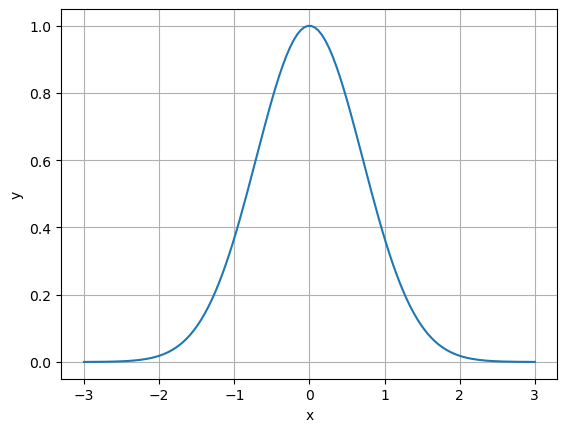

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n=128
x = np.linspace(-3,3,n)
y = np.exp(-(x**2))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.plot(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.savefig("rbf_1d.png")
plt.show()

### ２次元空間の動径基底関数

In [6]:
%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 32
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X, Y = np.meshgrid(x, y)
Z = np.exp(-(X**2+Y**2))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.grid()
ax.plot_wireframe(X,Y,Z, color='blue',linewidth=0.3)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.savefig("rbf_2d.png")
plt.show()

### 同心円状に分布する二つのクラス

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
gamma = 1
x = np.random.rand(1000)*2
y = np.random.rand(1000)*2

# 同心円の内側に分布するクラス
inner = ((x-1)**2 + (y-1)**2) < 0.3**2
xin = x[inner]
yin = y[inner]

# 同心円の外側に分布するクラス
outer = ((x-1)**2 + (y-1)**2) > 0.5**2
xout = x[outer]
yout = y[outer]

# ２つのクラスを結合
data_in = np.c_[xin,yin]
data_out = np.c_[xout,yout]
data = np.r_[data_in, data_out]
target = ((data[:,0]-1)**2 + (data[:,1]-1)**2) > 0.3**2

# 同心円状に分布するクラスのグラフ表示
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

c0 = data[target==False]
c1 = data[target]

ax.scatter( c0[:,0], c0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
ax.scatter( c1[:,0], c1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')
    
plt.savefig("rbf_data.png")
plt.show()

### 同心円状に分布するクラスを rbfカーネルSVM で分類

C:\Users\user\AppData\Local\Temp\ipykernel_35248\2861197060.py:71: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(SV[:,0], SV[:,1], c=(0,0,0,0), linewidths=1.0, edgecolors='red')


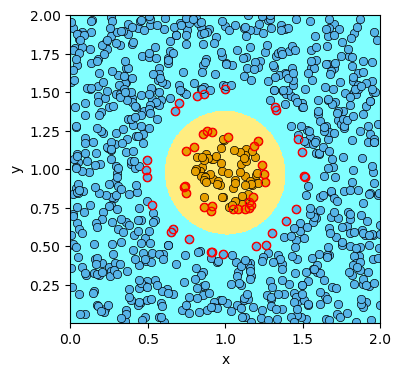

In [9]:
# -*- coding: utf-8 -*-
%matplotlib inline
from sklearn import datasets, svm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
X = data
y = np.array(target,dtype=int)


# 分類用にサポートベクトルマシン (Support Vector Classifier) を用意
# clf = svm.SVC(C=1.0, kernel="linear")
clf = svm.SVC(C=1.0, kernel='rbf')
# データに最適化
clf.fit(X, y)

##### 分類結果を背景の色分けにより表示

# 外花被片の長さ(sepal length)と幅(sepal width)の
# 最小値と最大値からそれぞれ1ずつ広げた領域を
# グラフ表示エリアとする
x_min = min(X[:,0])
x_max = max(X[:,0])
y_min = min(X[:,1])
y_max = max(X[:,1])

# グラフ表示エリアを縦横500ずつのグリッドに区切る
# (分類クラスに応じて背景に色を塗るため)
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]

# グリッドの点をscikit-learn用の入力に並べなおす
Xg = np.c_[XX.ravel(), YY.ravel()]

# 各グリッドの点が属するクラス(0か1)の予測をZに格納
Z = clf.predict(Xg)

# Zをグリッド上に並べなおす
Z = Z.reshape(XX.shape)

# クラス0 (iris setosa) が薄オレンジ (1, 0.93, 0.5, 1)
# クラス1 (iris versicolor) が薄青 (0.5, 1, 1, 1)
cmap01 = ListedColormap([(0.5, 1, 1, 1), (1, 0.93, 0.5, 1)])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

# 背景の色を表示
ax.pcolormesh(XX, YY, Z==0, cmap=cmap01)

# 軸ラベルを設定
plt.xlabel('x')
plt.ylabel('y')

##### ターゲットに応じた色付きでデータ点を表示

# iris setosa (y=0) のデータのみを取り出す
Xc0 = X[y==0]
# iris versicolor (y=1) のデータのみを取り出す
Xc1 = X[y==1]

# 内側 のデータXc0をプロット
ax.scatter(Xc0[:,0], Xc0[:,1], c='#E69F00', linewidths=0.5, edgecolors='black')
# 外側 のデータXc1をプロット
ax.scatter(Xc1[:,0], Xc1[:,1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# サポートベクトルを取得
SV = clf.support_vectors_
# サポートベクトルの点に対し、赤い枠線を表示
ax.scatter(SV[:,0], SV[:,1], c=(0,0,0,0), linewidths=1.0, edgecolors='red')

# 描画したグラフを表示
plt.savefig("rbf_svm.png")
plt.show()


### 同心円状に分布する２つのクラスに動径基底関数を適用

In [10]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 
gamma = 1
x = np.random.rand(1000)*2
y = np.random.rand(1000)*2

# 同心円の内側に分布するクラス
inner = ((x-1)**2 + (y-1)**2) < 0.3**2
xin = x[inner]
yin = y[inner]

# 同心円の外側に分布するクラス
outer = ((x-1)**2 + (y-1)**2) > 0.5**2
xout = x[outer]
yout = y[outer]

# ２つのクラスを結合
data_in = np.c_[xin,yin]
data_out = np.c_[xout,yout]
data = np.r_[data_in, data_out]
target = ((data[:,0]-1)**2 + (data[:,1]-1)**2) > 0.3**2
    
# target をint型に変換
cls = np.array(target,dtype=int)

X = data[:,0]
Y = data[:,1]

# X,Y に動径基底関数を適用して Z軸を生成
Z = np.exp(-((X-1)**2 + ((Y-1)**2)*gamma))

# X, Y, Z を３次元で描画
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[cls == 0],Y[cls == 0],Z[cls == 0], c='#E69F00', linewidths=0.5, edgecolors='black')
ax.scatter(X[cls == 1], Y[cls == 1], Z[cls == 1], c='#56B4E9', linewidths=0.5, edgecolors='black')

# ２つのクラスの境界に超平面を描画
zs = 0.85
ys = np.linspace(0, 2.0, 11)
xs = np.linspace(0, 2.0, 11)
Xs, Ys = np.meshgrid(xs, ys)
Zs = np.ones(11*11).reshape(11,11)*zs

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.plot_surface(Xs,Ys,Zs,alpha=0.3)

plt.show()